In [199]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib
from windrose import WindroseAxes
import seaborn as sns
import bottleneck as bn
import dataframe_image as dfi

In [200]:
# netCDF files
fn1='C:\\Users\\odemeo\\Documents\\Field_Data_Processing\\CACO_MET\\HoM\\1125C\\1125Cwxt-a.nc'
fn2='C:\\Users\\odemeo\\Documents\\Field_Data_Processing\\CACO_MET\\HoM\\1125D\\1125Dwxt-a.nc'
fn3='C:\\Users\\odemeo\\Documents\\Field_Data_Processing\\CACO_MET\\HoM\\1125E\\1125Ewxt-a.nc'

# Export path
figpath1125='C:\\Users\\odemeo\\Documents\\Field_Data_Processing\\CACO_MET\\HoM\\Figures\\'

In [201]:
# Read in mooring 1125
ds_1125C=xr.open_dataset(fn1)
ds_1125D=xr.open_dataset(fn2)
ds_1125E=xr.open_dataset(fn3)

# Convert to pandas dataframes
df_1125C=ds_1125C.to_dataframe()
df_1125D=ds_1125D.to_dataframe()
df_1125E=ds_1125E.to_dataframe()

# Concatenate data in one pandas data frame to make stats tables
df_1125=pd.concat([df_1125C,df_1125D,df_1125E])
df_1125=df_1125.reset_index(level='time') # Convert time from an index to a column

In [202]:
# Index pandas dataframe by season

# Spring
start_date='2021-04-01'
end_date='2021-07-01'
begin_idx=df_1125["time"] >= start_date
end_idx=df_1125["time"] < end_date
between_idx=begin_idx & end_idx
df_spring=df_1125.loc[between_idx]
df_stats1125_spring=df_spring.describe()
dfi.export(df_stats1125_spring, figpath1125+'1125_stats_spring.png')

In [203]:
# Summer
start_date='2021-07-01'
end_date='2021-10-01'
begin_idx=df_1125["time"] >= start_date
end_idx=df_1125["time"] < end_date
between_idx=begin_idx & end_idx
df_summer=df_1125.loc[between_idx]
df_stats1125_summer=df_summer.describe()
dfi.export(df_stats1125_summer, figpath1125+'1125_stats_summer.png')

In [204]:
# Fall
start_date='2021-10-01'
end_date='2022-01-01'
begin_idx=df_1125["time"] >= start_date
end_idx=df_1125["time"] < end_date
between_idx=begin_idx & end_idx
df_fall=df_1125.loc[between_idx]
df_stats1125_fall=df_fall.describe()
dfi.export(df_stats1125_fall, figpath1125+'1125_stats_fall.png')

In [205]:
# Pull out variables
time1125=np.concatenate((ds_1125C['time'].values,ds_1125D['time'].values,ds_1125E['time'].values))
wdir_min1125=np.concatenate((ds_1125C['WD_min'].values,ds_1125D['WD_min'].values,ds_1125E['WD_min'].values))
wdir_mean1125=np.concatenate((ds_1125C['WD_410'].values,ds_1125D['WD_410'].values,ds_1125E['WD_410'].values))
wdir_max1125=np.concatenate((ds_1125C['WD_gust'].values,ds_1125D['WD_gust'].values,ds_1125E['WD_gust'].values))
wsp_min1125=np.concatenate((ds_1125C['WS_min'].values,ds_1125D['WS_min'].values,ds_1125E['WS_min'].values))
wsp_mean1125=np.concatenate((ds_1125C['WS_401'].values,ds_1125D['WS_401'].values,ds_1125E['WS_401'].values))
wsp_max1125=np.concatenate((ds_1125C['WG_402'].values,ds_1125D['WG_402'].values,ds_1125E['WG_402'].values))
temp1125=np.concatenate((ds_1125C['T_21'].values,ds_1125D['T_21'].values,ds_1125E['T_21'].values))
relh1125=np.concatenate((ds_1125C['RH_910'].values,ds_1125D['RH_910'].values,ds_1125E['RH_910'].values))

# Get rid of bad rows
nans=np.argwhere(np.isnan(wdir_min1125)) # Find rows of NaNs

time1125=np.delete(time1125,nans)
wdir_min1125=np.delete(wdir_min1125,nans)
wdir_mean1125=np.delete(wdir_mean1125,nans)
wdir_max1125=np.delete(wdir_max1125,nans)
wsp_min1125=np.delete(wsp_min1125,nans)
wsp_mean1125=np.delete(wsp_mean1125,nans)
wsp_max1125=np.delete(wsp_max1125,nans)
temp1125=np.delete(temp1125,nans)
relh1125=np.delete(relh1125,nans)

In [206]:
# Index by season

# Spring
start_date = np.datetime64('2021-04-01')
end_date = np.datetime64('2021-07-01')
spring_idx=np.where((time1125 >= start_date) & (time1125 < end_date))

# Summer
start_date = np.datetime64('2021-07-01')
end_date = np.datetime64('2021-10-01')
summer_idx=np.where((time1125 >= start_date) & (time1125 < end_date))

# Fall
start_date = np.datetime64('2021-10-01')
end_date = np.datetime64('2022-01-01')
fall_idx=np.where((time1125 >= start_date) & (time1125 < end_date))

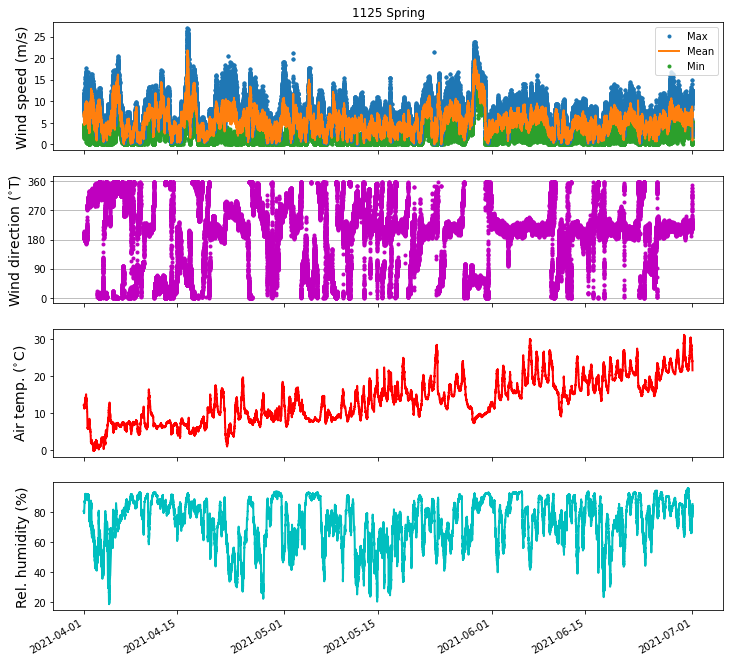

In [207]:
# 1125 Spring Time-series plots
fig, ax=plt.subplots(nrows=4, ncols=1, sharey=False, sharex=True, squeeze=True, figsize = (12,12))

# Wind speed
ax[0].plot(time1125[spring_idx],wsp_max1125[spring_idx], '.',zorder=1,label='Max')
ax[0].plot(time1125[spring_idx],wsp_mean1125[spring_idx],'-',linewidth=2,zorder=2,label='Mean')
ax[0].plot(time1125[spring_idx],wsp_min1125[spring_idx], '.',zorder=0,label='Min')
ax[0].set_ylabel('Wind speed (m/s)',fontsize=14)
ax[0].legend(loc=1)
ax[0].title.set_text('1125 Spring')
fig.autofmt_xdate() # Rotate x-axis labels so you can read all of them
#ax[0].text(.02,.85,'Wind speed',fontsize=16,transform=ax[0].transAxes)

# Wind direction
ax[1].plot(time1125[spring_idx],wdir_mean1125[spring_idx],'m.',linewidth=2)
ax[1].set_yticks([0.,90.,180.,270,360])
ax[1].set_ylabel('Wind direction ($^{\circ}$T)',fontsize=14)
ax[1].grid(axis = 'y')
#ax[1].text(.02,.85,'Wind direction (from)',fontsize=16,transform=ax[1].transAxes)

# Temp
ax[2].plot(time1125[spring_idx],temp1125[spring_idx],'r-',linewidth=2)
ax[2].set_ylabel('Air temp. ($^{\circ}$C)',fontsize=14)
#ax[2].text(.02,.1,'Air temperature',fontsize=16,transform=ax[2].transAxes)

# Relative humidity
ax[3].plot(time1125[spring_idx],relh1125[spring_idx],'c-',linewidth=2)
ax[3].set_ylabel('Rel. humidity (%)',fontsize=14);
#ax[3].text(.02,.1,'Relative humidity',fontsize=16,transform=ax[4].transAxes)

fig.savefig(figpath1125+'1125_Spring_Time_Series')

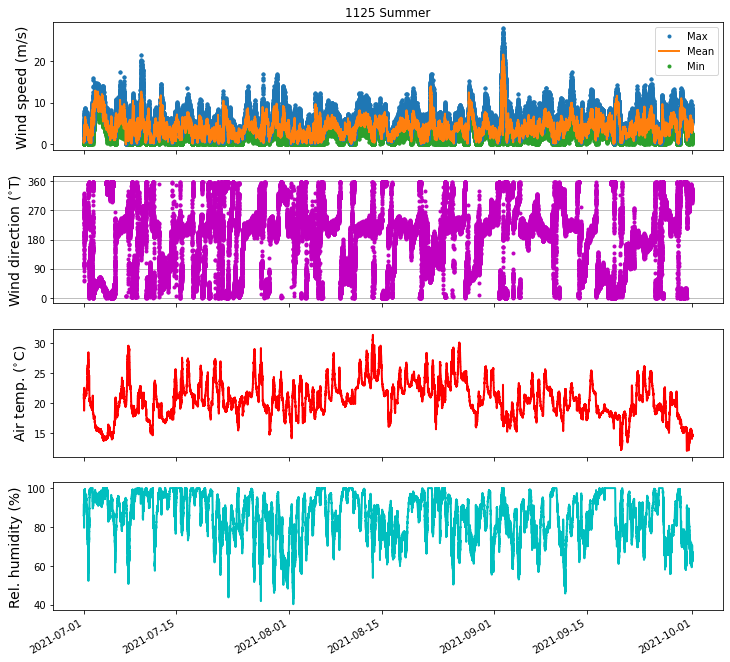

In [208]:
# 1125 Summer Time-series plots
fig, ax=plt.subplots(nrows=4, ncols=1, sharey=False, sharex=True, squeeze=True, figsize = (12,12))

# Wind speed
ax[0].plot(time1125[summer_idx],wsp_max1125[summer_idx], '.',zorder=1,label='Max')
ax[0].plot(time1125[summer_idx],wsp_mean1125[summer_idx],'-',linewidth=2,zorder=2,label='Mean')
ax[0].plot(time1125[summer_idx],wsp_min1125[summer_idx], '.',zorder=0,label='Min')
ax[0].set_ylabel('Wind speed (m/s)',fontsize=14)
ax[0].legend(loc=1)
ax[0].title.set_text('1125 Summer')
fig.autofmt_xdate() # Rotate x-axis labels so you can read all of them
#ax[0].text(.02,.85,'Wind speed',fontsize=16,transform=ax[0].transAxes)

# Wind direction
ax[1].plot(time1125[summer_idx],wdir_mean1125[summer_idx],'m.',linewidth=2)
ax[1].set_yticks([0.,90.,180.,270,360])
ax[1].set_ylabel('Wind direction ($^{\circ}$T)',fontsize=14)
ax[1].grid(axis = 'y')
#ax[1].text(.02,.85,'Wind direction (from)',fontsize=16,transform=ax[1].transAxes)

# Temp
ax[2].plot(time1125[summer_idx],temp1125[summer_idx],'r-',linewidth=2)
ax[2].set_ylabel('Air temp. ($^{\circ}$C)',fontsize=14)
#ax[2].text(.02,.1,'Air temperature',fontsize=16,transform=ax[2].transAxes)

# Relative humidity
ax[3].plot(time1125[summer_idx],relh1125[summer_idx],'c-',linewidth=2)
ax[3].set_ylabel('Rel. humidity (%)',fontsize=14);
#ax[3].text(.02,.1,'Relative humidity',fontsize=16,transform=ax[4].transAxes)

fig.savefig(figpath1125+'1125_Summer_Time_Series')

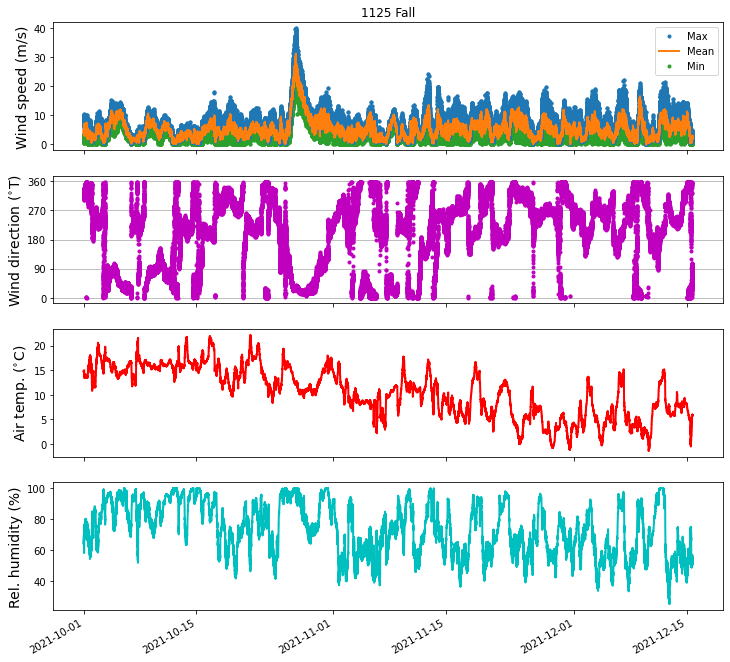

In [209]:
# 1125 Fall Time-series plots
fig, ax=plt.subplots(nrows=4, ncols=1, sharey=False, sharex=True, squeeze=True, figsize = (12,12))

# Wind speed
ax[0].plot(time1125[fall_idx],wsp_max1125[fall_idx], '.',zorder=1,label='Max')
ax[0].plot(time1125[fall_idx],wsp_mean1125[fall_idx],'-',linewidth=2,zorder=2,label='Mean')
ax[0].plot(time1125[fall_idx],wsp_min1125[fall_idx], '.',zorder=0,label='Min')
ax[0].set_ylabel('Wind speed (m/s)',fontsize=14)
ax[0].legend(loc=1)
ax[0].title.set_text('1125 Fall')
fig.autofmt_xdate() # Rotate x-axis labels so you can read all of them
#ax[0].text(.02,.85,'Wind speed',fontsize=16,transform=ax[0].transAxes)

# Wind direction
ax[1].plot(time1125[fall_idx],wdir_mean1125[fall_idx],'m.',linewidth=2)
ax[1].set_yticks([0.,90.,180.,270,360])
ax[1].set_ylabel('Wind direction ($^{\circ}$T)',fontsize=14)
ax[1].grid(axis = 'y')
#ax[1].text(.02,.85,'Wind direction (from)',fontsize=16,transform=ax[1].transAxes)

# Temp
ax[2].plot(time1125[fall_idx],temp1125[fall_idx],'r-',linewidth=2)
ax[2].set_ylabel('Air temp. ($^{\circ}$C)',fontsize=14)
#ax[2].text(.02,.1,'Air temperature',fontsize=16,transform=ax[2].transAxes)

# Relative humidity
ax[3].plot(time1125[fall_idx],relh1125[fall_idx],'c-',linewidth=2)
ax[3].set_ylabel('Rel. humidity (%)',fontsize=14);
#ax[3].text(.02,.1,'Relative humidity',fontsize=16,transform=ax[4].transAxes)

fig.savefig(figpath1125+'1125_Fall_Time_Series')

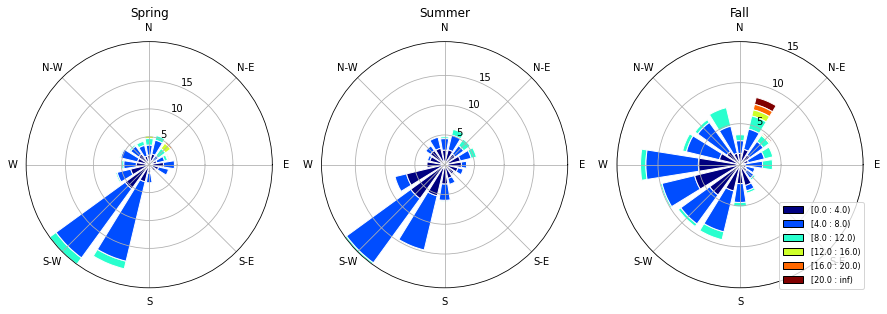

In [210]:
# Mean windrose plot

fig=plt.figure(figsize=(15, 5))
ax1=fig.add_subplot(1,3,1, projection='windrose')
ax2=fig.add_subplot(1,3,2, projection='windrose')
ax3=fig.add_subplot(1,3,3, projection='windrose')

# Spring
ax1.bar(wdir_mean1125[spring_idx], wsp_mean1125[spring_idx], bins=np.arange(0, 24, 4), normed=True, opening=0.8, edgecolor='white')
# ax1.set_legend(loc=4)
ax1.set_yticks(np.arange(5, 20, step=5))
ax1.set_yticklabels(np.arange(5, 20, step=5))
ax1.set_title("Spring")

# Summer
ax2.bar(wdir_mean1125[summer_idx], wsp_mean1125[summer_idx], bins=np.arange(0, 24, 4), normed=True, opening=0.8, edgecolor='white')
# ax2.set_legend(loc=4)
ax2.set_yticks(np.arange(5, 20, step=5))
ax2.set_yticklabels(np.arange(5, 20, step=5))
ax2.set_title("Summer")

# Fall
ax3.bar(wdir_mean1125[fall_idx], wsp_mean1125[fall_idx], bins=np.arange(0, 24, 4), normed=True, opening=0.8, edgecolor='white')
ax3.set_legend(loc=4)
ax3.set_yticks(np.arange(5, 20, step=5))
ax3.set_yticklabels(np.arange(5, 20, step=5))
ax3.set_title("Fall")

plt.savefig(figpath1125+'1125_Windrose_Mean_Subplot')

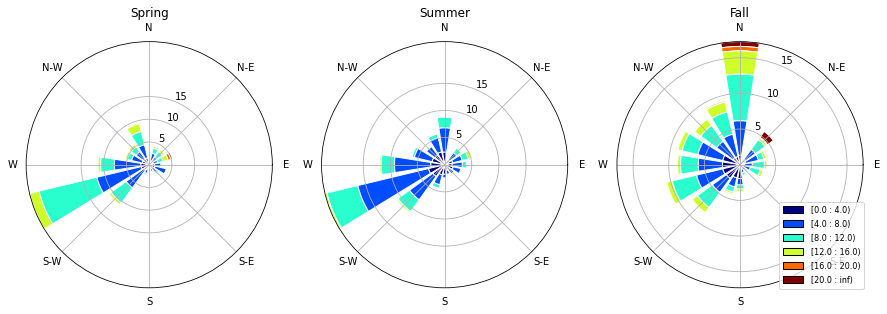

In [211]:
# Gust windrose plot

fig=plt.figure(figsize=(15, 5))
ax1=fig.add_subplot(1,3,1, projection='windrose')
ax2=fig.add_subplot(1,3,2, projection='windrose')
ax3=fig.add_subplot(1,3,3, projection='windrose')

# Spring
ax1.bar(wdir_max1125[spring_idx], wsp_max1125[spring_idx], bins=np.arange(0, 24, 4), normed=True, opening=0.8, edgecolor='white')
ax1.set_yticks(np.arange(5, 20, step=5))
ax1.set_yticklabels(np.arange(5, 20, step=5))
ax1.set_title("Spring")

# Summer
ax2.bar(wdir_max1125[summer_idx], wsp_max1125[summer_idx], bins=np.arange(0, 24, 4), normed=True, opening=0.8, edgecolor='white')
ax2.set_yticks(np.arange(5, 20, step=5))
ax2.set_yticklabels(np.arange(5, 20, step=5))
ax2.set_title("Summer")

# Fall
ax3.bar(wdir_max1125[fall_idx], wsp_max1125[fall_idx], bins=np.arange(0, 24, 4), normed=True, opening=0.8, edgecolor='white')
ax3.set_legend(loc=4)
ax3.set_yticks(np.arange(5, 20, step=5))
ax3.set_yticklabels(np.arange(5, 20, step=5))
ax3.set_title("Fall")

plt.savefig(figpath1125+'1125_Windrose_Gust_Subplot')

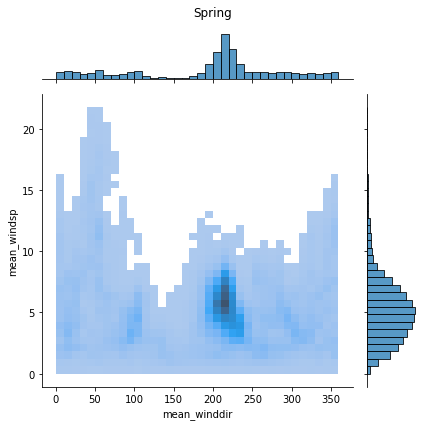

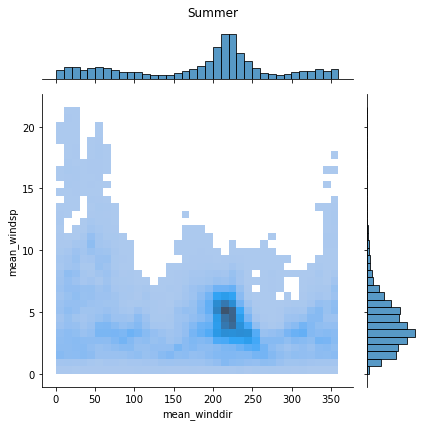

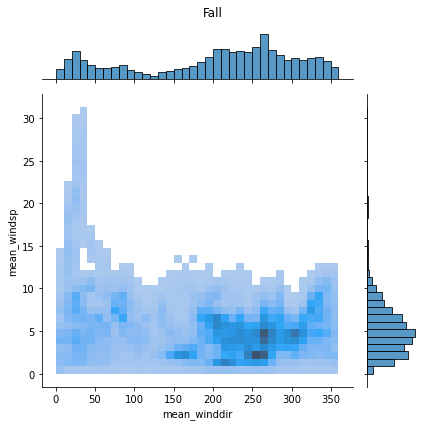

In [212]:
# Mean wind joint-probability

# Spring
df_wind_mean=pd.DataFrame({'mean_windsp': wsp_mean1125[spring_idx], 'mean_winddir': wdir_mean1125[spring_idx]})
p1=sns.jointplot(data=df_wind_mean, x="mean_winddir", y="mean_windsp", bins=36, kind="hist", marginal_kws=dict(bins=36))
p1.fig.suptitle("Spring")
p1.fig.tight_layout()
plt.savefig(figpath1125+'1125_Spring_JointProb_Mean')

# Summer
df_wind_mean=pd.DataFrame({'mean_windsp': wsp_mean1125[summer_idx], 'mean_winddir': wdir_mean1125[summer_idx]})
p2=sns.jointplot(data=df_wind_mean, x="mean_winddir", y="mean_windsp", bins=36, kind="hist", marginal_kws=dict(bins=36))
p2.fig.suptitle("Summer")
p2.fig.tight_layout()
plt.savefig(figpath1125+'1125_Summer_JointProb_Mean')

# Fall
df_wind_mean=pd.DataFrame({'mean_windsp': wsp_mean1125[fall_idx], 'mean_winddir': wdir_mean1125[fall_idx]})
p3=sns.jointplot(data=df_wind_mean, x="mean_winddir", y="mean_windsp", bins=36, kind="hist", marginal_kws=dict(bins=36))
p3.fig.suptitle("Fall")
p3.fig.tight_layout()
plt.savefig(figpath1125+'1125_Fall_JointProb_Mean')

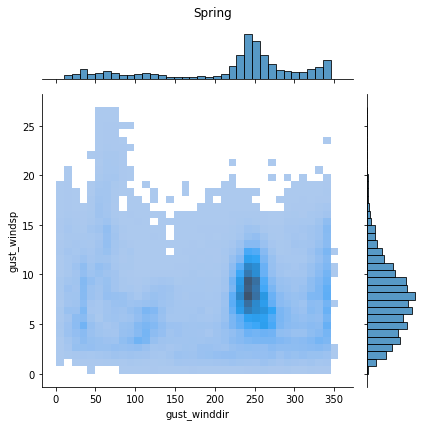

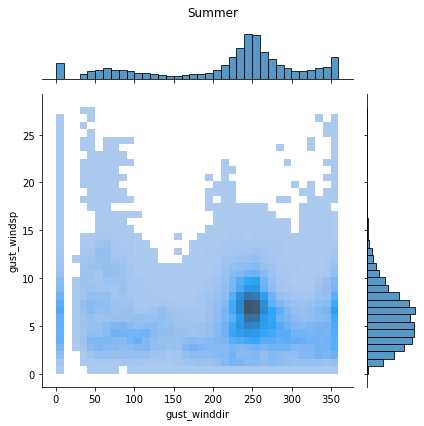

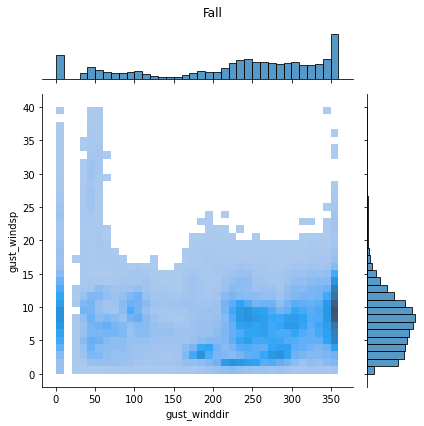

In [213]:
# Gust wind joint-probability

# Spring
df_wind_gust=pd.DataFrame({'gust_windsp': wsp_max1125[spring_idx], 'gust_winddir': wdir_max1125[spring_idx]})
p1=sns.jointplot(data=df_wind_gust, x="gust_winddir", y="gust_windsp", bins=36, kind="hist", marginal_kws=dict(bins=36))
p1.fig.suptitle("Spring")
p1.fig.tight_layout()
plt.savefig(figpath1125+'1125_Spring_JointProb_Gust')

# Summer
df_wind_gust=pd.DataFrame({'gust_windsp': wsp_max1125[summer_idx], 'gust_winddir': wdir_max1125[summer_idx]})
p2=sns.jointplot(data=df_wind_gust, x="gust_winddir", y="gust_windsp", bins=36, kind="hist", marginal_kws=dict(bins=36))
p2.fig.suptitle("Summer")
p2.fig.tight_layout()
plt.savefig(figpath1125+'1125_Summer_JointProb_Gust')

# Fall
df_wind_gust=pd.DataFrame({'gust_windsp': wsp_max1125[fall_idx], 'gust_winddir': wdir_max1125[fall_idx]})
p3=sns.jointplot(data=df_wind_gust, x="gust_winddir", y="gust_windsp", bins=36, kind="hist", marginal_kws=dict(bins=36))
p3.fig.suptitle("Fall")
p3.fig.tight_layout()
plt.savefig(figpath1125+'1125_Fall_JointProb_Gust')

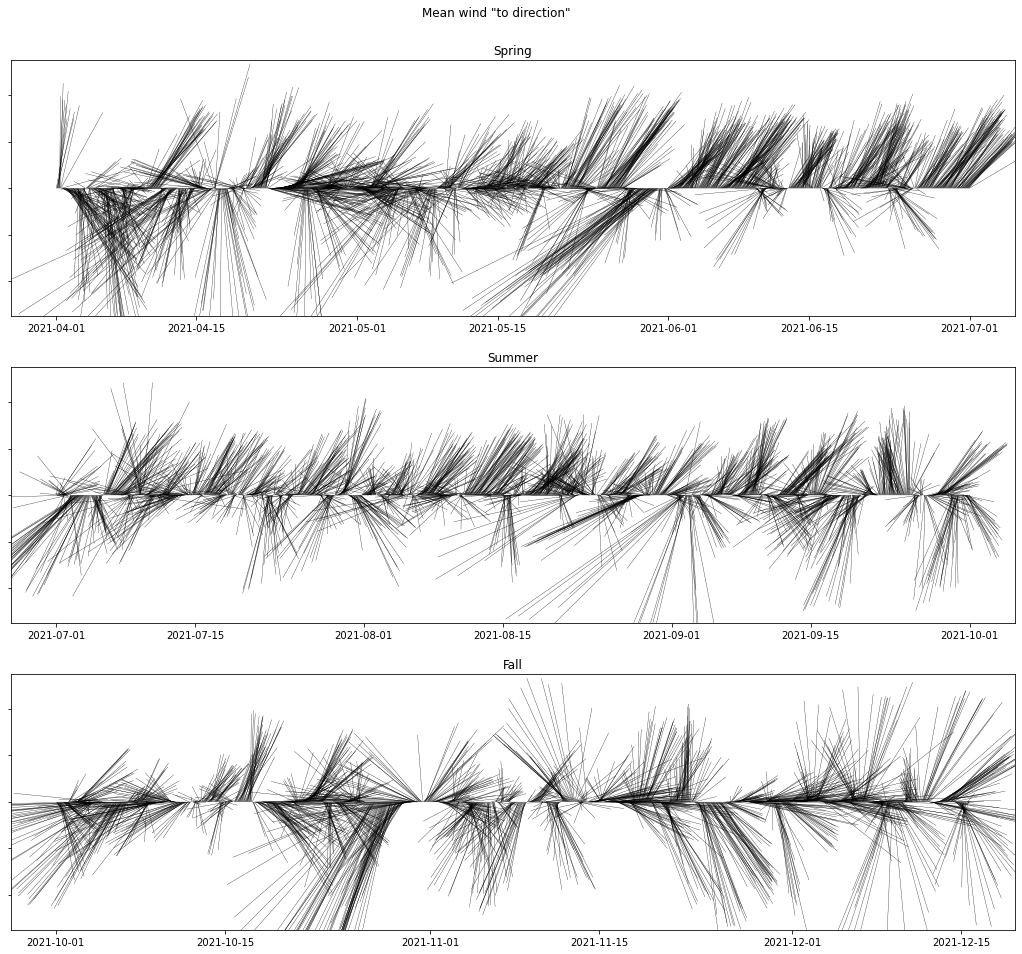

In [214]:
# Stick plots of rolling average mean wind

# Set figure
props = {'units' : "dots",
    'width' : 0.3,
    'headwidth': 0,
    'headlength': 0,
    'headaxislength': 0,
    'scale' : .08
        }
fig, ax = plt.subplots(3, 1, figsize=(18, 15))
plt.suptitle('Mean wind "to direction"')
fig.subplots_adjust(top=0.93)

# SPRING
# Calculate wind components from speed and metereological wind direction (wind from direction)
u_mean = -wsp_mean1125[spring_idx] * np.sin(np.radians(wdir_mean1125[spring_idx]))
v_mean = -wsp_mean1125[spring_idx] * np.cos(np.radians(wdir_mean1125[spring_idx]))

# Calculate rolling average of wind components
u_mean_roll=bn.move_mean(u_mean, window=61) # Returns same length with NaNs at beginning
v_mean_roll=bn.move_mean(v_mean, window=61)

# Get hourly samples: Start at 60 and grab every 60 values since samples are on the minute
u_mean_hourly=u_mean_roll[60::60] 
v_mean_hourly=v_mean_roll[60::60]
time_idx=time1125[spring_idx]
time1125_hourly=time_idx[60::60]

# Plot
qiv = ax[0].quiver(time1125_hourly, [[0]*len(time1125_hourly)] , u_mean_hourly, v_mean_hourly, angles='uv', **props)
plt.setp(ax[0].get_yticklabels(), visible=False)
ax[0].set_title('Spring')

# SUMMER
# Calculate wind components from speed and metereological wind direction (wind from direction)
u_mean = -wsp_mean1125[summer_idx] * np.sin(np.radians(wdir_mean1125[summer_idx]))
v_mean = -wsp_mean1125[summer_idx] * np.cos(np.radians(wdir_mean1125[summer_idx]))

# Calculate rolling average of wind components
u_mean_roll=bn.move_mean(u_mean, window=61) # Returns same length with NaNs at beginning
v_mean_roll=bn.move_mean(v_mean, window=61)

# Get hourly samples: Start at 60 and grab every 60 values since samples are on the minute
u_mean_hourly=u_mean_roll[60::60] 
v_mean_hourly=v_mean_roll[60::60]
time_idx=time1125[summer_idx]
time1125_hourly=time_idx[60::60]

# Plot
qiv = ax[1].quiver(time1125_hourly, [[0]*len(time1125_hourly)] , u_mean_hourly, v_mean_hourly, angles='uv', **props)
plt.setp(ax[1].get_yticklabels(), visible=False)
ax[1].set_title('Summer')

# FALL
# Calculate wind components from speed and metereological wind direction (wind from direction)
u_mean = -wsp_mean1125[fall_idx] * np.sin(np.radians(wdir_mean1125[fall_idx]))
v_mean = -wsp_mean1125[fall_idx] * np.cos(np.radians(wdir_mean1125[fall_idx]))

# Calculate rolling average of wind components
u_mean_roll=bn.move_mean(u_mean, window=61) # Returns same length with NaNs at beginning
v_mean_roll=bn.move_mean(v_mean, window=61)

# Get hourly samples: Start at 60 and grab every 60 values since samples are on the minute
u_mean_hourly=u_mean_roll[60::60] 
v_mean_hourly=v_mean_roll[60::60]
time_idx=time1125[fall_idx]
time1125_hourly=time_idx[60::60]

# Plot
qiv = ax[2].quiver(time1125_hourly, [[0]*len(time1125_hourly)] , u_mean_hourly, v_mean_hourly, angles='uv', **props)
plt.setp(ax[2].get_yticklabels(), visible=False)
ax[2].set_title('Fall')

plt.savefig(figpath1125+'1125_StickRollAvg_Mean_Subplot')

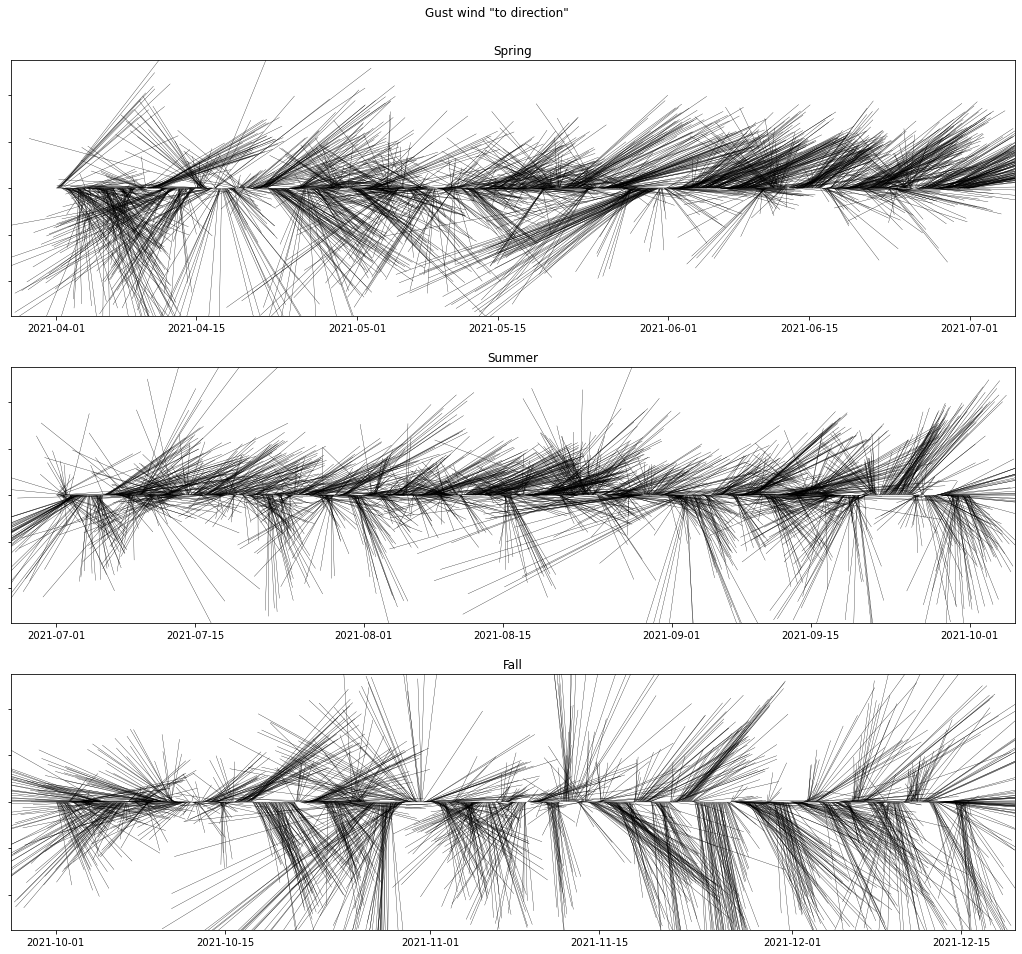

In [215]:
# Stick plots of rolling average gust wind

# Set figure
props = {'units' : "dots",
    'width' : 0.3,
    'headwidth': 0,
    'headlength': 0,
    'headaxislength': 0,
    'scale' : .08
        }
fig, ax = plt.subplots(3, 1, figsize=(18, 15))
plt.suptitle('Gust wind "to direction"')
fig.subplots_adjust(top=0.93)

# SPRING
# Calculate wind components from speed and metereological wind direction (wind from direction)
u_mean = -wsp_max1125[spring_idx] * np.sin(np.radians(wdir_max1125[spring_idx]))
v_mean = -wsp_max1125[spring_idx] * np.cos(np.radians(wdir_max1125[spring_idx]))

# Calculate rolling average of wind components
u_mean_roll=bn.move_mean(u_mean, window=61) # Returns same length with NaNs at beginning
v_mean_roll=bn.move_mean(v_mean, window=61)

# Get hourly samples: Start at 60 and grab every 60 values since samples are on the minute
u_mean_hourly=u_mean_roll[60::60] 
v_mean_hourly=v_mean_roll[60::60]
time_idx=time1125[spring_idx]
time1125_hourly=time_idx[60::60]

# Plot
qiv = ax[0].quiver(time1125_hourly, [[0]*len(time1125_hourly)] , u_mean_hourly, v_mean_hourly, angles='uv', **props)
plt.setp(ax[0].get_yticklabels(), visible=False)
ax[0].set_title('Spring')

# SUMMER
# Calculate wind components from speed and metereological wind direction (wind from direction)
u_mean = -wsp_max1125[summer_idx] * np.sin(np.radians(wdir_max1125[summer_idx]))
v_mean = -wsp_max1125[summer_idx] * np.cos(np.radians(wdir_max1125[summer_idx]))

# Calculate rolling average of wind components
u_mean_roll=bn.move_mean(u_mean, window=61) # Returns same length with NaNs at beginning
v_mean_roll=bn.move_mean(v_mean, window=61)

# Get hourly samples: Start at 60 and grab every 60 values since samples are on the minute
u_mean_hourly=u_mean_roll[60::60] 
v_mean_hourly=v_mean_roll[60::60]
time_idx=time1125[summer_idx]
time1125_hourly=time_idx[60::60]

# Plot
qiv = ax[1].quiver(time1125_hourly, [[0]*len(time1125_hourly)] , u_mean_hourly, v_mean_hourly, angles='uv', **props)
plt.setp(ax[1].get_yticklabels(), visible=False)
ax[1].set_title('Summer')

# FALL
# Calculate wind components from speed and metereological wind direction (wind from direction)
u_mean = -wsp_max1125[fall_idx] * np.sin(np.radians(wdir_max1125[fall_idx]))
v_mean = -wsp_max1125[fall_idx] * np.cos(np.radians(wdir_max1125[fall_idx]))

# Calculate rolling average of wind components
u_mean_roll=bn.move_mean(u_mean, window=61) # Returns same length with NaNs at beginning
v_mean_roll=bn.move_mean(v_mean, window=61)

# Get hourly samples: Start at 60 and grab every 60 values since samples are on the minute
u_mean_hourly=u_mean_roll[60::60] 
v_mean_hourly=v_mean_roll[60::60]
time_idx=time1125[fall_idx]
time1125_hourly=time_idx[60::60]

# Plot
qiv = ax[2].quiver(time1125_hourly, [[0]*len(time1125_hourly)] , u_mean_hourly, v_mean_hourly, angles='uv', **props)
plt.setp(ax[2].get_yticklabels(), visible=False)
ax[2].set_title('Fall')

plt.savefig(figpath1125+'1125_StickRollAvg_Gust_Subplot')